In [3]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plot 
import scipy
from scipy.optimize import curve_fit
import pandas as pd

#Units conversion from geometrical units
G = 6.67*10**(-11)
c = 3*10**8
k = (c**2)/G
k1 = (((10**-3))/(k*(1.98*10**30)))

#loading the data
df = pd.read_csv("data from plotanalyser.csv")

#Converting the data fromm 
fpeak  = df['fpeak'].to_numpy()
m_Xaxis = (df["(M/R^3)^1/2"].to_numpy())
#fpeak , m_Xaxis

#Curve fit Mention the paper where relation is there
def linear_fit(m_Xaxis , a ,b):
    return a*m_Xaxis + b

##Defining the EoS## Apr: = 9.90km 
def fpeak_Bauswein(Mtot , Rmax):
   return (38.24889509836317)*((Mtot/(Rmax)**3)**0.5) - 0.2927097279270208

coeffs, cov = curve_fit(linear_fit,m_Xaxis,fpeak)
A,B = coeffs

m1 = np.array([1.2,1.2,1.35])
m2 = np.array([1.2,1.5,1.35])
Rmax = 9.90
mgf = 1.470588
R1p6 = 11.27

Mtot = m1+m2

Mtot_g = [i*mgf for i in Mtot]
X = [((i*mgf)/(Rmax)**3)**0.5 for i in Mtot]
fpeak1 = [fpeak_Bauswein(i , Rmax) for i in Mtot_g]

def get_Mchirp(m1,m2):
    return ((m1*m2))**(3/5)/((m1+m2)**(1/5))

#fpeak from Vretinaris numerical simulation paper (R_1.6)
def fpeak_empirical_relation(Mchirp,R):
    b0 = 1.5220
    b1 = 8.4021
    b2 = 2.3876
    b3 = -1.1133
    b4 = -0.1291
    b5 = 0.0366
    return b0 + b1*(Mchirp) + b2*(Mchirp**2) + b3*(Mchirp*R) + b4*((Mchirp**2)*R) + b5*(Mchirp*(R**2))

#Defining the Mchirp
Mchirp = [get_Mchirp(_m1, _m2) for _m1, _m2 in zip(m1, m2)]
fpeak2 = [fpeak_empirical_relation(Mchirp = i ,R = R1p6) for i in Mchirp]
  

fpeak1,fpeak2, X, Mchirp#in KHz
#A,B


([2.0141289900774835, 2.1540622229799795, 2.1540622229799795],
 [3.066192973246322, 3.378888668956244, 3.4023463675332843],
 [0.060311251137375295, 0.06396974199162443, 0.06396974199162443],
 [1.044660675955349, 1.166516134976123, 1.1752432604497676])

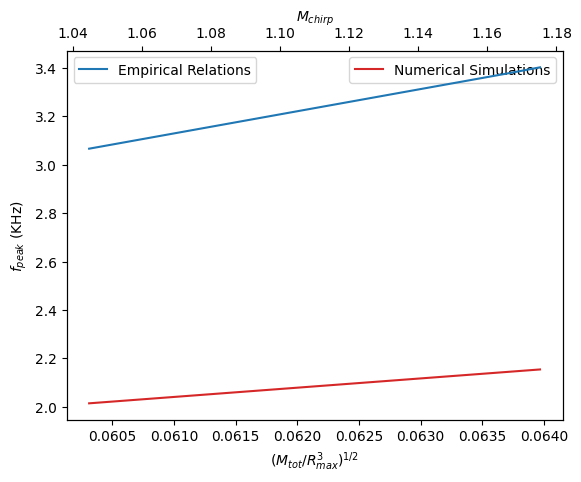

In [5]:
#Plotting

fig, ax1 = plot.subplots() 
plot.xlabel("$(M_{tot}/R_{max}^3)^{1/2}$")
ax1.set_ylabel("$f_{peak}$ (KHz)" )

ax1.plot(X, fpeak1 , color = 'tab:red' ,label = "Numerical Simulations" ) 
plot.legend()


ax2 = ax1.twiny()

#plot.ylabel("$f_{peak} (KHz)$")
ax2.plot(Mchirp, fpeak2,label = "Empirical Relations")
ax2.set_xlabel("$M_{chirp}$")
plot.legend()

plot.show()

(38.24889509836317, -0.2927097279270208)

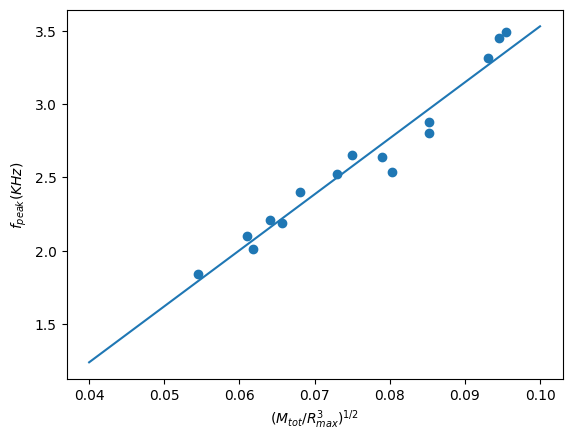

In [7]:
#Using the plot analyser data

plot.scatter(m_Xaxis,fpeak)
plot.ylabel("$f_{peak} (KHz)$")
plot.xlabel("$(M_{tot}/R_{max}^3)^{1/2}$")

x = np.linspace(0.04,0.1,100)
y = A*x + B
plot.plot(x,y)
A,B

In [8]:
fpeak, m_Xaxis

(array([1.83825465, 2.09968526, 2.00830711, 2.18742012, 2.21046257,
        2.39811159, 2.525732  , 2.65661421, 2.63895088, 2.53894134,
        2.88044826, 2.80630424, 3.31563186, 3.45515498, 3.492103  ]),
 array([0.05446346, 0.06096341, 0.0618289 , 0.06564959, 0.06404527,
        0.06800013, 0.07295565, 0.07503507, 0.07891388, 0.0803141 ,
        0.08521227, 0.08520897, 0.09312465, 0.09460245, 0.09547366]))

In [21]:
x = 0.06096341
Mtot_ = (x**2)*((12.63)**3)
print(Mtot_/mgf)

5.905548676016011
